In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob

# log_parse is the python module, should be in this directory
import log_parse

In [8]:
txt_log_list = glob.glob('*.txt')
print "txt log dumps:" + '\n\t'.join(['']+txt_log_list),'\n'


test_log_filename = txt_log_list[1]
print 'test_log_filename is "{0}"'.format(test_log_filename),'\n'

# test_log is a list of dicts. Each dict represents a single scan.
# Print the attributes of each element of test_log.
test_log = log_parse.read_log(test_log_filename)
scan_keys = test_log[0].keys()
print "Read log. There are {0} scan records".format(len(test_log))
print "Attributes (=keys) of each scan (=test_log[<index>]):"
for key_str in ('    --{0} ({1})'.format(k.ljust(20),type(test_log[0][k])) 
                                            for k in scan_keys):
    print key_str
    

print '*'*40
print "Looking at first scan..."
# fs = "first scan"
fs = test_log[0]
# Print the min range from the first scan
print "min range is {0}".format(min(fs['ranges']))

txt log dumps:
	RPLIDAR-IMU-for-mapping-laserscan-data.txt
	IT-DOES-THE-THING-MITERS-HALLWAY-scan.txt 

test_log_filename is "IT-DOES-THE-THING-MITERS-HALLWAY-scan.txt" 

Read log. There are 2876 scan records
Attributes (=keys) of each scan (=test_log[<index>]):
    --angle_min            (<type 'float'>)
    --seq                  (<type 'float'>)
    --range_min            (<type 'float'>)
    --scan_time            (<type 'float'>)
    --range_max            (<type 'float'>)
    --angle_increment      (<type 'float'>)
    --nsecs                (<type 'float'>)
    --angle_max            (<type 'float'>)
    --ranges               (<type 'numpy.ndarray'>)
    --frame_id             (<type 'str'>)
    --secs                 (<type 'float'>)
    --intensities          (<type 'numpy.ndarray'>)
    --time_increment       (<type 'float'>)
****************************************
Looking at first scan...
min range is 0.486000001431


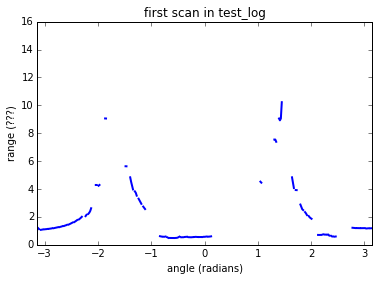

In [9]:
min_angle = fs['angle_min']
delta_angle = fs['angle_increment']
max_angle = fs['angle_max'] + delta_angle
# ^^ delta_angle added to max_angle to make len(angles) == len(ranges)

angles = np.arange(min_angle,max_angle,delta_angle)
ranges = fs['ranges']

# Make a scatterplot of the range at each angle in the first scan.
plt.plot(angles,ranges,linewidth=2)
plt.xlim((-np.pi,np.pi))
plt.title('first scan in test_log')
plt.xlabel('angle (radians)')
plt.ylabel('range (???)')
plt.show()

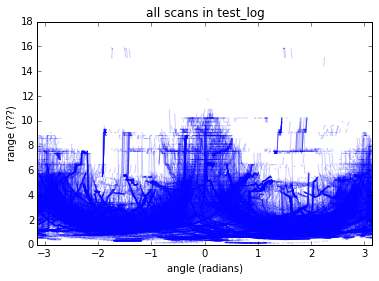

In [10]:
# Now overlay all the scans on the same axes
# (angles defined in the previous cell)
for scan in test_log:
    plt.plot(angles,scan['ranges'],color='blue',alpha=0.2)
    
plt.xlim((-np.pi,np.pi))
plt.title('all scans in test_log')
plt.xlabel('angle (radians)')
plt.ylabel('range (???)')
plt.show()